In [9]:
import sys

sys.path.append("../../src")
from main.transporter_dataset import create_dataset
from main.eval import (
    quick_test
)
from main.plots import labeled_clustermap, get_clusters, cluster_samples_plot
from main.compositions import calculate_paac

LOG_FILE = "../../logs/athaliana_amino_sugar_potassium.log"

In [10]:
df_all = create_dataset(
    keywords_substrate_filter=["Amino-acid transport", "Sugar transport", "Potassium transport"],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="keep",
    # outliers=["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"],
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    # sequence_clustering=70
)

In [11]:
df_all.keywords_location.value_counts()

Membrane;Transmembrane                                        154
Cell membrane;Membrane;Transmembrane                           71
Endoplasmic reticulum;Membrane;Transmembrane                    9
Membrane;Plastid inner membrane;Transmembrane                   2
Membrane;Mitochondrion;Transmembrane                            2
Cell membrane;Endoplasmic reticulum;Membrane;Transmembrane      1
Cell membrane;Membrane;Nucleus;Transmembrane                    1
Name: keywords_location, dtype: int64

In [12]:
df_paac = calculate_paac(sequences=df_all.sequence)

# Transporter class

There is one transporter in class 1, how many of the uncategorized proteins are also in class 1?

In [13]:
df_all.tcdb_class.value_counts()

0.0    150
2.A     76
1.A     14
Name: tcdb_class, dtype: int64

There is a small cluster of proteins without tcdb accession that have a similar paac profile. Are these proteins related?

{'0.0': 'cyan', '1.A': 'magenta', '2.A': 'yellow'}

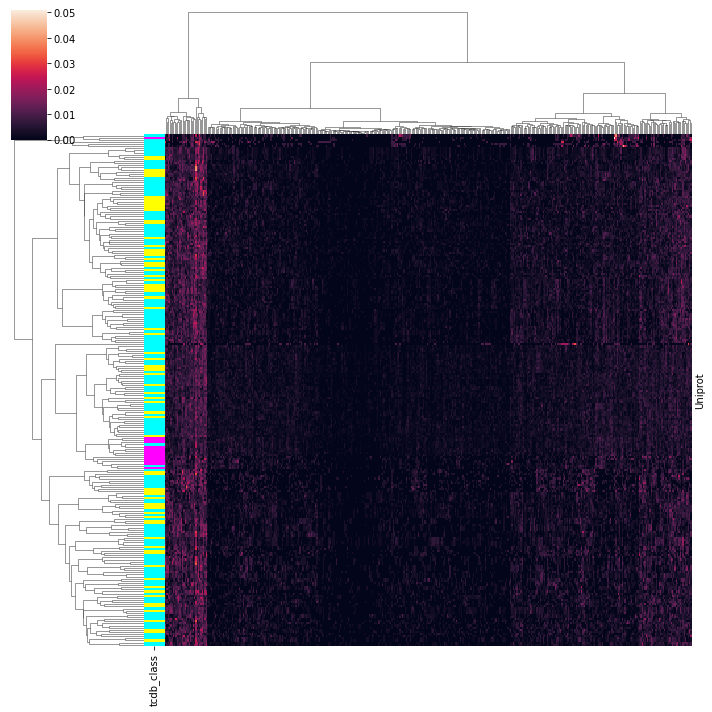

In [14]:
labeled_clustermap(df_paac, df_all.tcdb_class)

As before in the A Thaliana dataset, we find the seven GDU proteins: 

In [15]:
clusters = get_clusters(df_paac, n_clusters=2)
df_all.loc[clusters[1]]

,keywords_transport,keywords_location,keywords_transport_related,gene_names,protein_names,tcdb_id,tcdb_class,organism_id,sequence
Uniprot,,,,,,,,,
O81775,Amino-acid transport,Cell membrane;Membrane;Transmembrane,Transport,GDU1 At4g31730 F28M20.80,Protein GLUTAMINE DUMPER 1,1.A.41.2.2,1.A,3702,MRPLSVQSKFEDVATSTSVNHHGVTPQSPWHSPVPYLFGGLAAMLG...
Q9SW07,Amino-acid transport,Membrane;Transmembrane,Transport,GDU2 At4g25760 F14M19.40,Protein GLUTAMINE DUMPER 2,NaN,0.0,3702,MQTMEGRQYNYQDSINASSSMVVPHSPWHSPVPYLFGGLAAMLALI...
Q9FHH5,Amino-acid transport,Membrane;Transmembrane,Transport,GDU3 LBS1 At5g57685 MRI1.4,Protein GLUTAMINE DUMPER 3 (Protein LESS SUSCE...,NaN,0.0,3702,MEGRQYYPPRENVEGNRTTMGGGPHSPWHSPVPYLFGGLAAMLGLI...
Q8S8A0,Amino-acid transport,Membrane;Transmembrane,Transport,GDU4 At2g24762 F27A10.11,Protein GLUTAMINE DUMPER 4,NaN,0.0,3702,MRPLSIKPTSLDVARHATSVESFGNHRPPISPWHSPVPYLFGGLAA...
Q3E965,Amino-acid transport,Membrane;Transmembrane,Transport,GDU5 At5g24920 F6A4.130,Protein GLUTAMINE DUMPER 5,NaN,0.0,3702,MRQFPSIRGNINEKMMTTMVESQTRSPWRTPVPYLFGGLAAMLGLI...
Q3EAV6,Amino-acid transport,Membrane;Transmembrane,Transport,GDU6 At3g30725 T4A2.7,Protein GLUTAMINE DUMPER 6,NaN,0.0,3702,MRPTPKVEIWKSPVPYLFGGLFLLVLLIALALLSLVCTHQKPSSSS...


# Without outliers

In [16]:
df_all = create_dataset(
    keywords_substrate_filter=["Amino-acid transport", "Sugar transport", "Potassium transport"],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="keep",
    outliers=["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"],
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    # sequence_clustering=70
)

In [17]:
df_all.keywords_transport.value_counts()

Sugar transport                                       118
Ion transport;Potassium transport                      62
Amino-acid transport                                   47
Ion transport;Potassium transport;Sodium transport      6
Name: keywords_transport, dtype: int64

In [18]:
df_all.keywords_transport_related.value_counts()

Transport                                                        121
Antiport;Transport                                                56
Symport;Transport                                                 41
Ion channel;Potassium channel;Transport;Voltage-gated channel      9
Ion channel;Potassium channel;Transport                            6
Name: keywords_transport_related, dtype: int64

## Plots of properties

- The sodium transporters form a subcluster, along with amino-acid and sugar transporters
- There is a small number of potassium transporters labeled as "ion channel", and/or "voltage-gated ion channel".
    - Voltage-independent channels also exist in the dataset, according to Uniprot describtions (e.g. Q9FWX6)
    - The Ion Channel transporters mostly coincide with those labeled explicitly as "1.A" in TCDB

In [19]:
df_paac = calculate_paac(df_all.sequence)

{'Amino-acid transport': 'cyan',
 'Ion transport;Potassium transport': 'magenta',
 'Ion transport;Potassium transport;Sodium transport': 'yellow',
 'Sugar transport': 'green'}

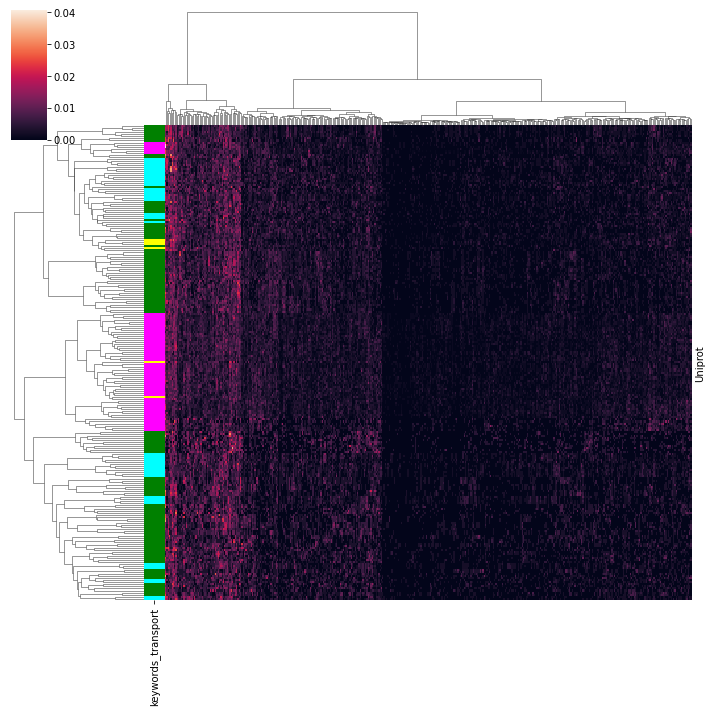

In [20]:
labeled_clustermap(df_paac, df_all.keywords_transport)

{'Antiport;Transport': 'cyan',
 'Ion channel;Potassium channel;Transport': 'magenta',
 'Ion channel;Potassium channel;Transport;Voltage-gated channel': 'yellow',
 'Symport;Transport': 'green',
 'Transport': 'orange'}

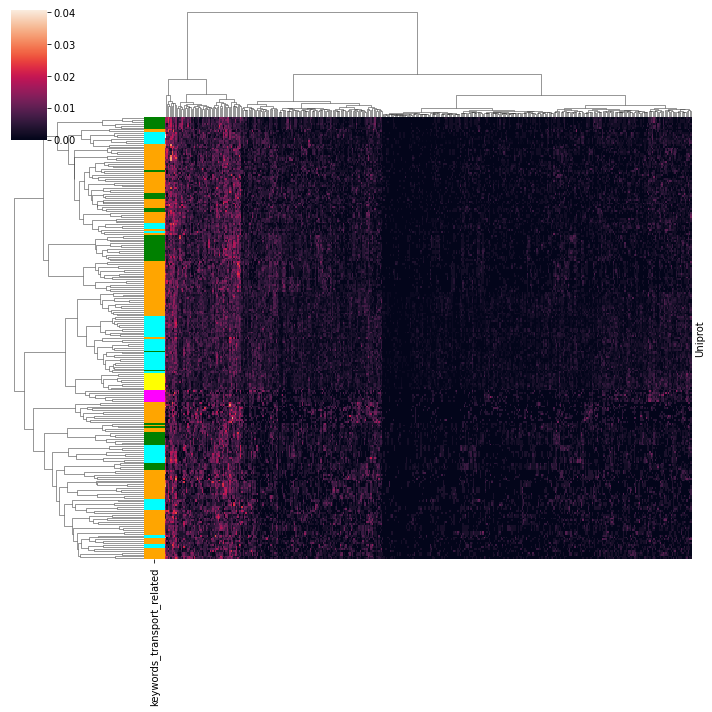

In [21]:
labeled_clustermap(df_paac, df_all.keywords_transport_related)

{'0.0': 'cyan', '1.A': 'magenta', '2.A': 'yellow'}

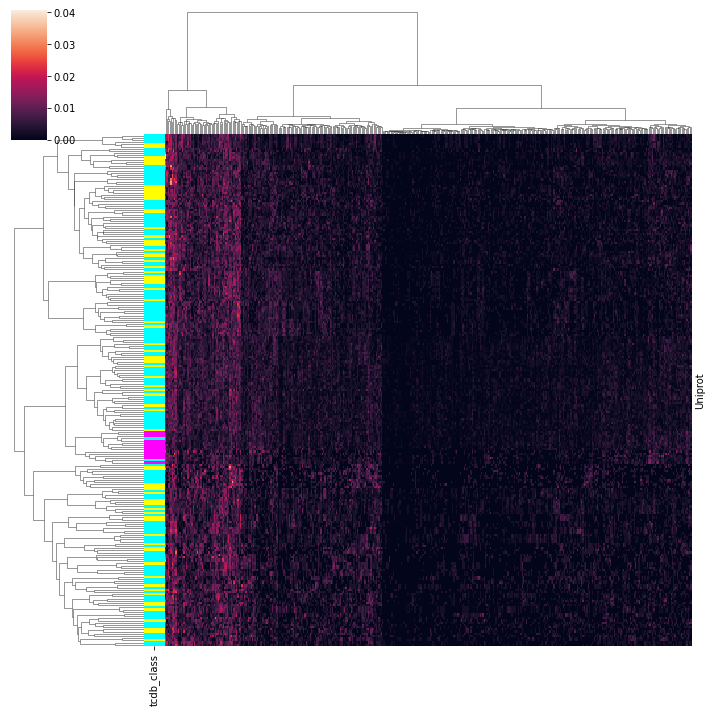

In [22]:
labeled_clustermap(df_paac, df_all.tcdb_class)

# Quick evaluation

- Good results
- Can be improved a bit by removing Sodium transporters
- Removing channels does not bring benefit

In [24]:

labels = df_all.keywords_transport.str.replace(";Sodium transport","")

quick_test(df_paac, labels)

{'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.913
Default  0.913
{'pca__n_components': 0.98, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.896
PCA 0.896
{'selectkbest__k': 239, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.931
Kbest 0.931


In [25]:
sodium_proteins = df_all[df_all.keywords_transport.str.contains("Sodium")].index.values
print(sodium_proteins)
df_no_sodium = df_all[~df_all.index.isin(sodium_proteins)]
df_paac_no_sodium = calculate_paac(df_no_sodium.sequence)
labels_no_sodium = labels.loc[df_paac_no_sodium.index]
quick_test(df_paac_no_sodium, labels_no_sodium)

['Q2UVJ5' 'O04034' 'Q9FKP1' 'Q9LJI2' 'Q9SYG9' 'Q84TI7']
{'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.92
Default  0.92
{'pca__n_components': 0.96, 'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.901
PCA 0.901
{'selectkbest__k': 201, 'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.946
Kbest 0.946


In [26]:
channel_proteins = df_all[
    df_all.keywords_transport_related.str.contains("Ion")
    | df_all.tcdb_class.str.startswith("1")
].index.values

df_no_channels = df_all[~df_all.index.isin(channel_proteins)]
df_paac_no_channels = calculate_paac(df_no_channels.sequence)
labels_no_channels = labels.loc[df_paac_no_channels.index]
quick_test(df_paac_no_channels, labels_no_channels)

{'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.915
Default  0.915
{'pca__n_components': 0.98, 'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.891
PCA 0.891
{'selectkbest__k': 260, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.929
Kbest 0.929


# Cd hit sequence clustering

In [ ]:
sodium = ["Q2UVJ5", "O04034", "Q9FKP1", "Q9LJI2", "Q9SYG9", "Q84TI7"]
gdu = ["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"]
df_all = create_dataset(
    keywords_substrate_filter=[
        "Amino-acid transport",
        "Sugar transport",
        "Potassium transport",
    ],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="integrate",
    outliers=gdu + sodium,
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    # sequence_clustering=70,
)


In [ ]:
df_all.keywords_transport.value_counts()

Sugar transport         118
Potassium transport      62
Amino-acid transport     47
Name: keywords_transport, dtype: int64

cd-hit: clustered 227 sequences into 73 clusters at threshold 40
cd-hit: clustered 227 sequences into 110 clusters at threshold 50
cd-hit: clustered 227 sequences into 145 clusters at threshold 60
cd-hit: clustered 227 sequences into 167 clusters at threshold 70
cd-hit: clustered 227 sequences into 195 clusters at threshold 80
cd-hit: clustered 227 sequences into 217 clusters at threshold 90
cd-hit: clustered 227 sequences into 227 clusters at threshold 100


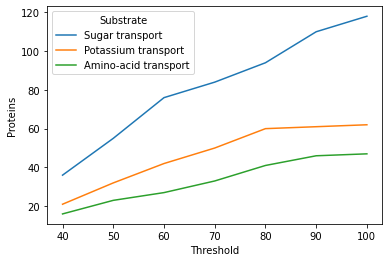

In [ ]:
cluster_samples_plot(df_all.sequence, df_all.keywords_transport)